# Neural Network Regression: Diabetes Dataset

이 노트북에서는 **Diabetes 데이터셋**을 활용하여 신경망 회귀 모델을 학습합니다.
※ Diabetes 데이터셋은 당뇨병 진행 정도를 예측하는 회귀 문제입니다.
- 데이터셋 출처: [sklearn.datasets.load_diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)
- 데이터셋 설명: 10개의 특성(나이, 성별, 체질량지수 등)과 1개의 타겟 변수(1년 후 당뇨병 진행 정도)로 구성되어 있습니다.

## 목표
1. 데이터 불러오기 및 전처리
2. Neural Network 모델 정의
3. 학습 및 학습 곡선 확인
4. 성능 평가 및 예측 시각화


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. 데이터 불러오기

In [18]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (442, 10)
Target shape: (442,)


In [19]:
print(X[0, :])  # 첫 번째 샘플의 특성 값
print(y[0])     # 첫 번째 샘플의 타겟 값

[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
151.0


## 2. 데이터 분리 및 전처리

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("훈련 데이터 shape:", X_train.shape, y_train.shape)
print("테스트 데이터 shape:", X_test.shape, y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

훈련 데이터 shape: (353, 10) (353,)
테스트 데이터 shape: (89, 10) (89,)


## 3. 모델 정의

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.summary()

c:\Users\pjsos\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

## 4. 모델 컴파일

In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss="mse",
              metrics=["mae"])

## 5. 모델 학습

In [14]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    verbose=0)

## 6. 학습 곡선 확인

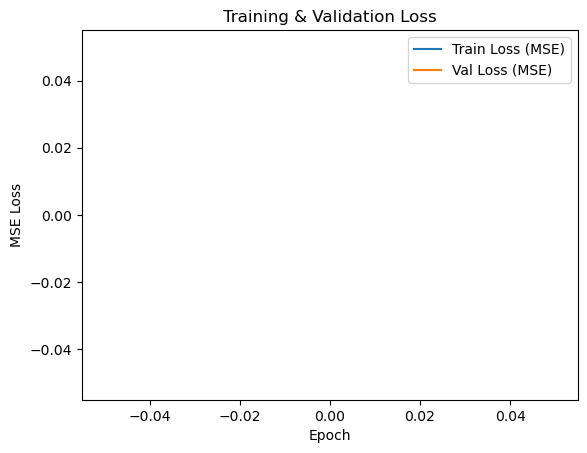

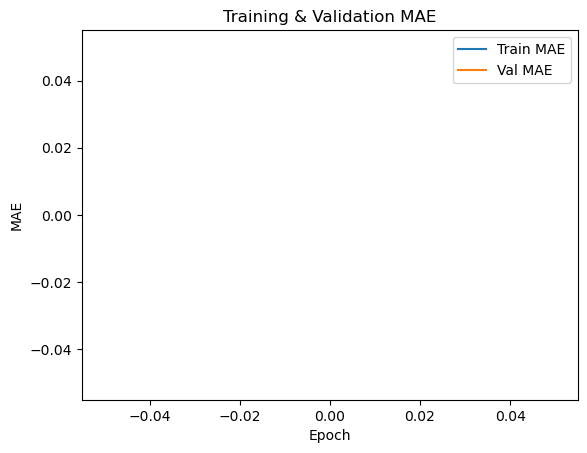

In [15]:
plt.plot(history.history['loss'], label="Train Loss (MSE)")
plt.plot(history.history['val_loss'], label="Val Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

plt.plot(history.history['mae'], label="Train MAE")
plt.plot(history.history['val_mae'], label="Val MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.title("Training & Validation MAE")
plt.show()

## 7. 모델 평가

In [20]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 MAE: {mae:.3f}")

테스트 MAE: nan
